<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Jun_ML_Classification_2_HW_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
### YOUR CODE HERE ###


df = pd.read_csv('sample_data/train.csv')
age_median = df.groupby('Sex')['Age'].median()

def age_replace(row, age_median_female, age_median_male):
  if pd.isnull(row['Cabin']):
    row['Cabin'] = 'U'
  if pd.isnull(row['Embarked']):
    row['Embarked'] = 'U'
  if pd.isnull(row['Age']):
    if row['Sex'] == 'female':
      row['Age'] = age_median_female
    else:
      row['Age'] = age_median_male
  return row

df_age_median = df.apply(age_replace, args = [age_median['female'], 
                                              age_median['male']], axis = 1)
df_1 = df_age_median.replace({'Sex': {'male': 0, 'female': 1}, 
                       'Embarked': {"U": 0, "S": 1, "C": 2, "Q": 3}}) \
                       .drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_survived = df_1['Survived']
df_2 = df_1.drop(columns=['Survived'])

x_train, x_test, y_train, y_test = train_test_split(df_2, df_survived, 
                                                    test_size=0.25, 
                                                    random_state=17)

model_knc = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
model_gnb = GaussianNB().fit(x_train, y_train)
model_dtc = DecisionTreeClassifier().fit(x_train, y_train)
model_lrg = LogisticRegression().fit(x_train, y_train)

y_pred = model_knc.predict(x_test)


In [ ]:
print('recall_score = ', recall_score(y_test, y_pred))
print('precision_score = ', precision_score(y_test, y_pred))

recall_score =  0.4891304347826087
precision_score =  0.6818181818181818


In [ ]:
cm_knc = confusion_matrix(y_test, y_pred)
precision = cm_knc[1][1] / (cm_knc[1][1] + cm_knc[0][1])
recall = cm_knc[1][1] / (cm_knc[1][1] + cm_knc[1][0])
print('precision =', precision)
print('recall =', recall)

precision = 0.6818181818181818
recall = 0.4891304347826087


In [ ]:
f1_m = 2 * precision * recall / (precision + recall)
print('F1-measure =', f1_m)

F1-measure = 0.5696202531645569


In [ ]:
f1_score(y_test, y_pred)

0.5696202531645569

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [ ]:
### YOUR CODE HERE ###

print()
print('KNeighborsClassifier')
print()
y_pred = model_knc.predict(x_test)
print('precision_recall_fscore_support =', precision_recall_fscore_support(y_test, y_pred))
print('classification_report =', classification_report(y_test, y_pred))
print('-'*30)

print()
print('GaussianNB')
print()
y_pred = model_gnb.predict(x_test)
print('precision_recall_fscore_support =', precision_recall_fscore_support(y_test, y_pred))
print('classification_report =', classification_report(y_test, y_pred))
print('-'*30)

print()
print('DecisionTreeClassifier')
print()
y_pred = model_dtc.predict(x_test)
print('precision_recall_fscore_support =', precision_recall_fscore_support(y_test, y_pred))
print('classification_report =', classification_report(y_test, y_pred))
print('-'*30)

print()
print('LogisticRegression')
print()
y_pred = model_lrg.predict(x_test)
print('precision_recall_fscore_support =', precision_recall_fscore_support(y_test, y_pred))
print('classification_report =', classification_report(y_test, y_pred))
print('-'*30)



KNeighborsClassifier

precision_recall_fscore_support = (array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92]))
classification_report =               precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223

------------------------------

GaussianNB

precision_recall_fscore_support = (array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92]))
classification_report =               precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78 

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [ ]:
### YOUR CODE HERE ###

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True).get_n_splits(x_train, y_train)


In [ ]:
np.logspace(-1, 2, 500)

array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.14939935,   0.15148189,   0.15359347,
         0.15573448,   0.15790533,   0.16010645,   0.16233824,
         0.16460115,   0.1668956 ,   0.16922204,   0.1715809 ,
         0.17397264,   0.17639773,   0.17885662,   0.18134978,
         0.1838777 ,   0.18644085,   0.18903974,   0.19167485,
         0.19434669,   0.19705578,   0.19980263,   0.20258777,
         0.20541173,   0.20827506,   0.2111783 ,   0.21412202,
         0.21710676,   0.22013311,   0.22320165,   0.22631296,
         0.22946764,   0.23266629,   0.23590953,   0.23

In [ ]:
clf = LogisticRegressionCV(Cs=500, cv=skf, scoring="roc_auc", random_state=17).fit(x_train, y_train)
clf.C_


array([13.4977233])

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [ ]:
import matplotlib.pyplot as plt

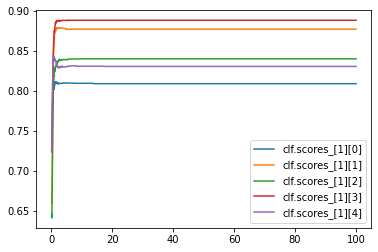

In [ ]:
### YOUR CODE HERE ###

plt.plot(Cs, clf.scores_[1][0], label='clf.scores_[1][0]')
plt.plot(Cs, clf.scores_[1][1], label='clf.scores_[1][1]')
plt.plot(Cs, clf.scores_[1][2], label='clf.scores_[1][2]')
plt.plot(Cs, clf.scores_[1][3], label='clf.scores_[1][3]')
plt.plot(Cs, clf.scores_[1][4], label='clf.scores_[1][4]')
plt.legend()
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

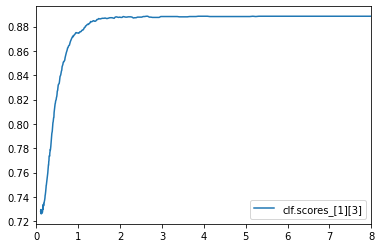

In [ ]:
### YOUR CODE HERE ###

plt.plot(Cs, clf.scores_[1][3], label='clf.scores_[1][3]')
plt.legend()
plt.xlim(0, 8)
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

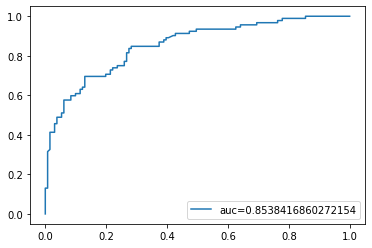

In [ ]:
### YOUR CODE HERE ###

probas = LogisticRegression().fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()